# Loan Prediction Project Using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Data Cleaning

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train.shape

(614, 13)

In [4]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_train.isnull().count()

Loan_ID              614
Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
Property_Area        614
Loan_Status          614
dtype: int64

In [6]:
df_test.shape

(367, 12)

In [7]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = ((df_train.isnull().sum())/(df_train.isnull().count())).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing)

                   Total   Percent
Credit_History        50  0.081433
Self_Employed         32  0.052117
LoanAmount            22  0.035831
Dependents            15  0.024430
Loan_Amount_Term      14  0.022801
Gender                13  0.021173
Married                3  0.004886
Loan_Status            0  0.000000
Property_Area          0  0.000000
CoapplicantIncome      0  0.000000
ApplicantIncome        0  0.000000
Education              0  0.000000
Loan_ID                0  0.000000


In [8]:
for i in df_train.columns:
    df_train[i] = df_train[i].fillna(df_train[i].dropna().mode().values[0])
for i in df_test.columns:
    df_test[i] = df_test[i].fillna(df_test[i].dropna().mode().values[0])

## Visualizing Data

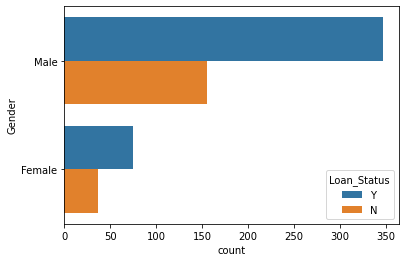

In [9]:
sns.countplot(y = 'Gender', hue='Loan_Status', data = df_train)

Males have the tendency to be on load more than females and the number of people are on loan in each gender is greater than the others

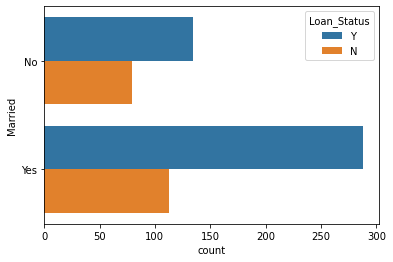

In [10]:
sns.countplot(y='Married', hue='Loan_Status', data = df_train)

Married couples are on loan more than single people

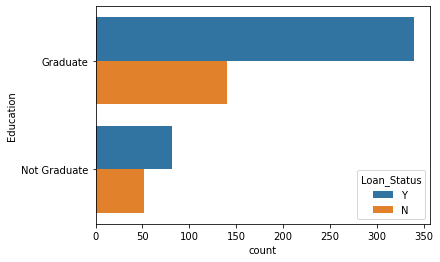

In [11]:
sns.countplot(y='Education', hue='Loan_Status', data = df_train)

People who has graduated are more likely to get a loan than non-graduate

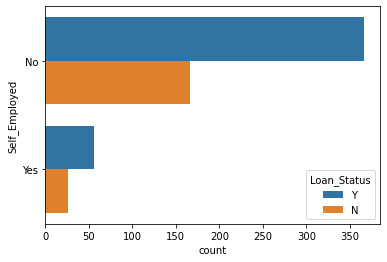

In [12]:
sns.countplot(y='Self_Employed', hue='Loan_Status', data = df_train)

People who obtained a loan are more likely not self_employed since they have more probability to pay back the loan 

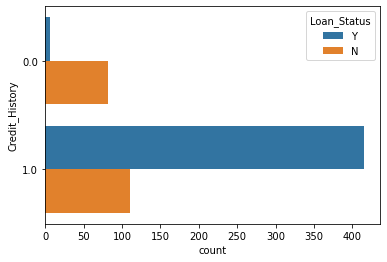

In [13]:
sns.countplot(y='Credit_History', hue='Loan_Status', data = df_train)

According to the credit history, greater number of people pay back their loans.

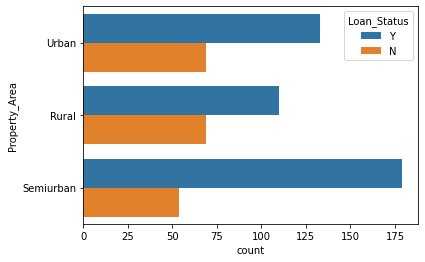

In [14]:
sns.countplot(y='Property_Area', hue='Loan_Status', data = df_train)

Semiurban has the most loan follow by Urban and Rural

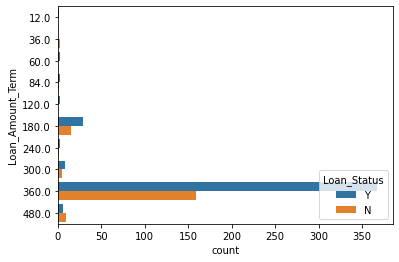

In [15]:
sns.countplot(y='Loan_Amount_Term', hue='Loan_Status', data = df_train)

Most people choose the option to payback the loan within a year


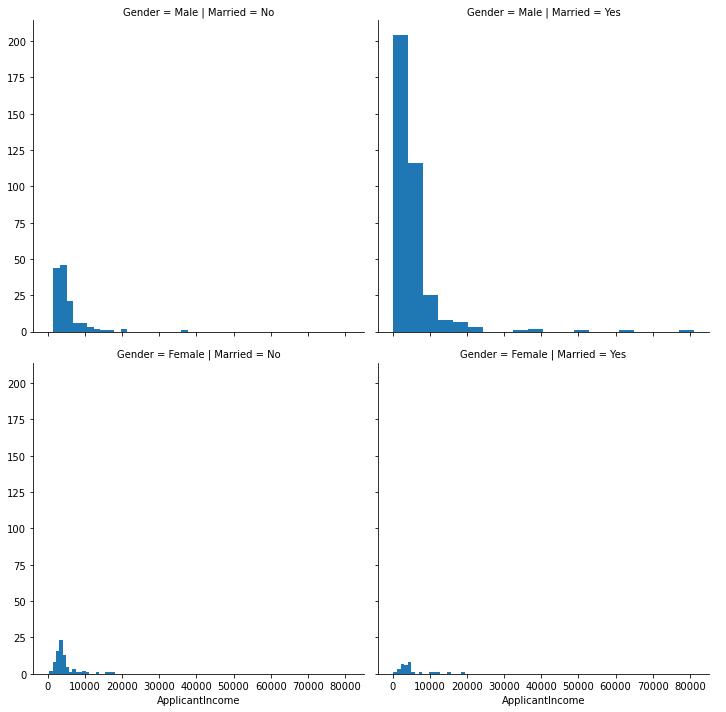

In [16]:
grid1 = sns.FacetGrid(df_train, row='Gender', col='Married', height=5, aspect=1)
grid1.map(plt.hist, 'ApplicantIncome', alpha=1, bins=20)
grid1.add_legend()

As we can see, in the data set males tend to have a higher income and married males earn more than single males

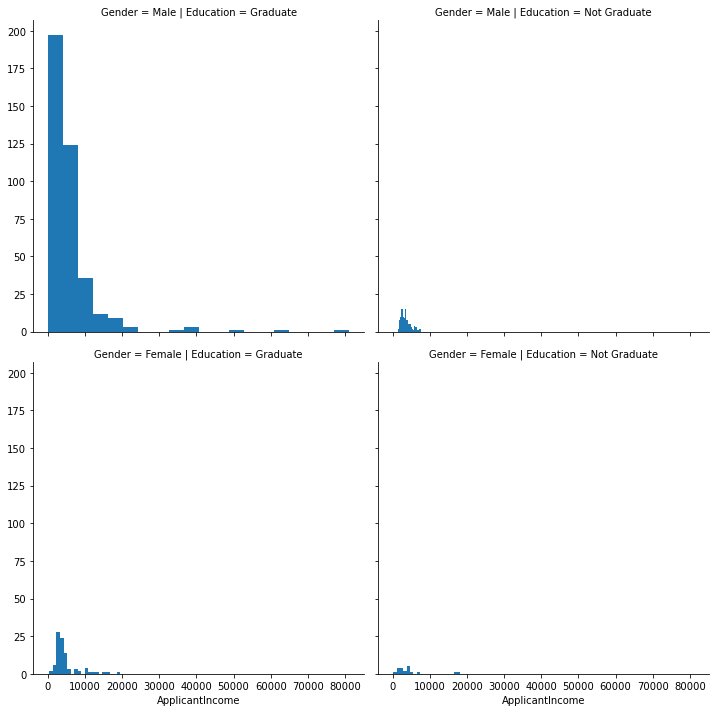

In [17]:
grid1 = sns.FacetGrid(df_train, row='Gender', col='Education', height=5, aspect=1)
grid1.map(plt.hist, 'ApplicantIncome', alpha=1, bins=20)
grid1.add_legend()

Males are more likely to graduate than femlaes. In addition income of male graduate are higher than that of females. This is rather sad and sexist but it's true for the current society.


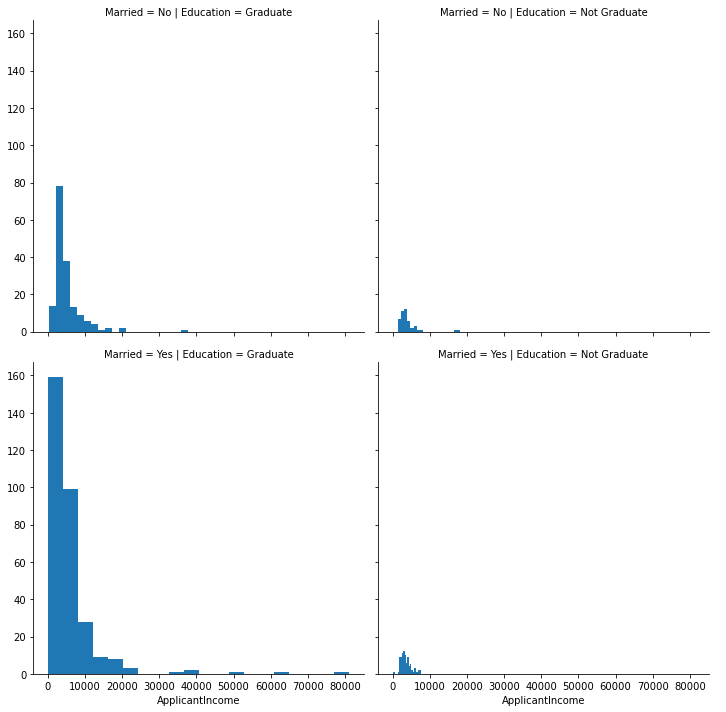

In [18]:
grid1 = sns.FacetGrid(df_train, row='Married', col='Education', height=5, aspect=1)
grid1.map(plt.hist, 'ApplicantIncome', alpha=1, bins=20)
grid1.add_legend()

People who are married and graduated have higher income than their counterpart respectively.

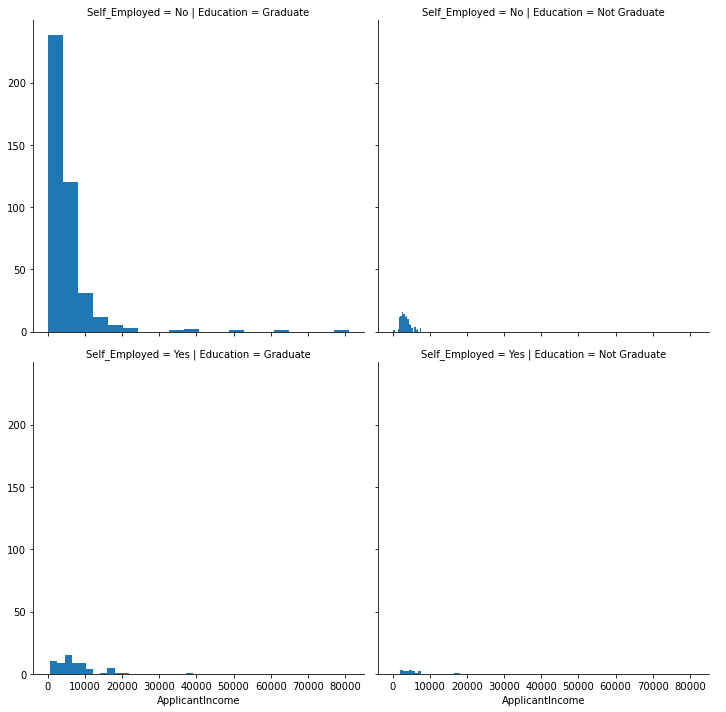

In [19]:
grid1 = sns.FacetGrid(df_train, row='Self_Employed', col='Education', height=5, aspect=1)
grid1.map(plt.hist, 'ApplicantIncome', alpha=1, bins=20)
grid1.add_legend()

It is only logical that graduated people are less likely to be self employed and they would have higher income than the rest

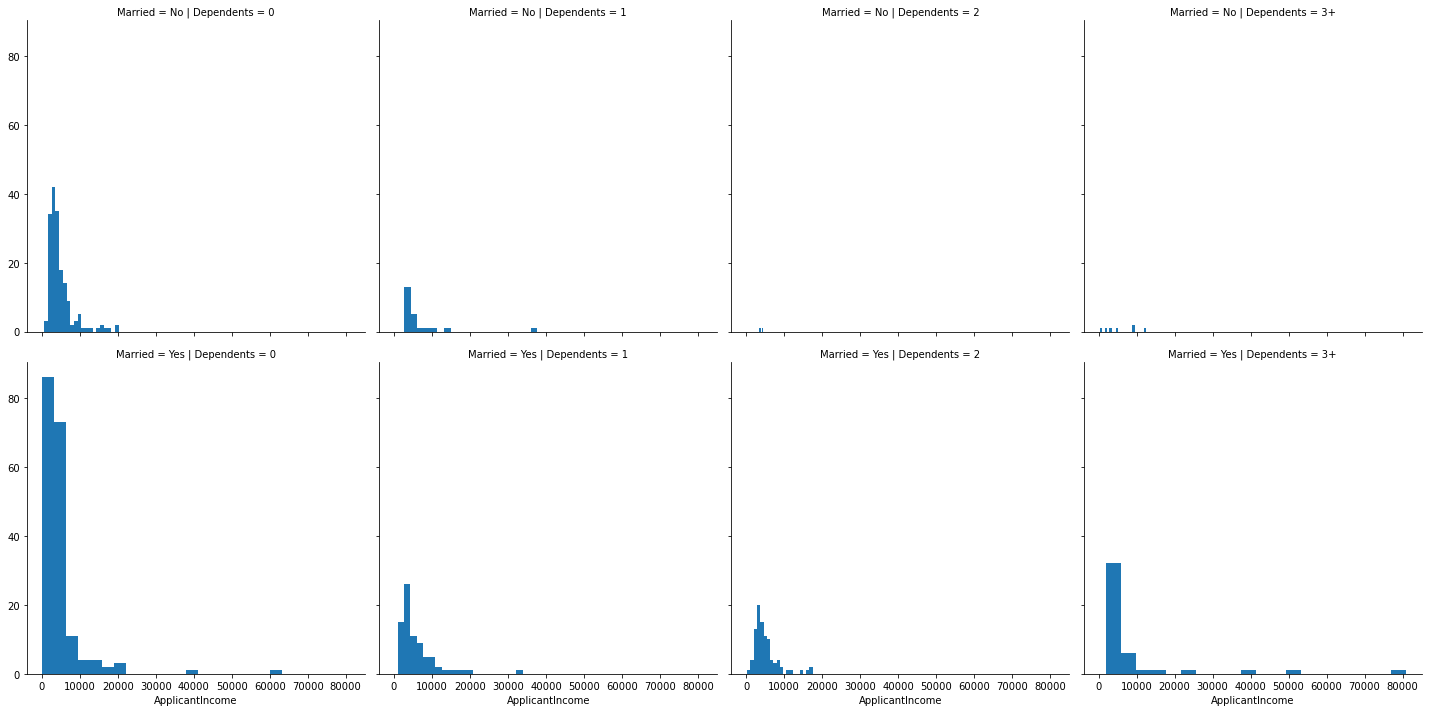

In [20]:
grid1 = sns.FacetGrid(df_train, row='Married', col='Dependents', height=5, aspect=1)
grid1.map(plt.hist, 'ApplicantIncome', alpha=1, bins=20)
grid1.add_legend()

In general, being single and has no dependents has more income than having dependents. Married couples with 0 dependents have greater income and the effect decreases as the number of dependents grows.

## Training

In [21]:
code = {'Female': 0, 'Male': 1, 'No': 0, 'Yes': 1, 'Not Graduate': 0, 'Graduate': 1, 'Rural': 0, 'Semiurban': 1, 'Urban': 2, 'N': 0, 'Y': 1, '3+': 3}

In [22]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
df_train.drop('Loan_ID', axis=1, inplace=True)
df_test.drop('Loan_ID', axis=1, inplace=True)

In [24]:
df_train = df_train.applymap(lambda i: code.get(i) if i in code else i)
df_test = df_test.applymap(lambda i: code.get(i) if i in code else i)

In [25]:
df_train.Dependents = pd.to_numeric(df_train.Dependents)
df_test.Dependents = pd.to_numeric(df_test.Dependents)

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.6 KB


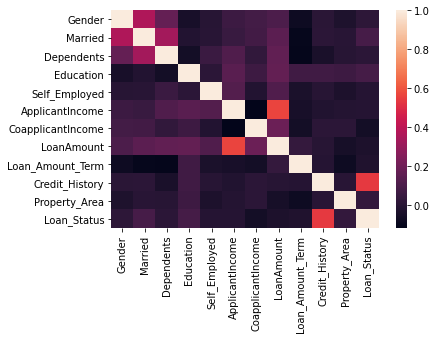

In [27]:
sns.heatmap(df_train.corr())

In [28]:
y = df_train['Loan_Status']
x = df_train.drop('Loan_Status', axis=1)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [30]:
model = LogisticRegression(max_iter=200)

In [31]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [32]:
predictions = model.predict(x_test)

In [33]:
print(predictions)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [34]:
evaluation = f1_score(y_test, predictions)
evaluation

0.8949152542372881

## Test with data outside of the training data

In [39]:
test = model.predict(df_test)
test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

## Conclusion

Using logistic regression to predict the data, we trained a model with a accuracy of 89.5%, which I considered a good rate compared to other method like Tree Classifer and Random Forest Classifier (77.5% and 85.4% respectively as tested [here](https://medium.com/devcareers/loan-prediction-using-selected-machine-learning-algorithms-1bdc00717631))